In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data,
                                    y, random_state=0)

In [4]:
import numpy as np
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(
X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print(' : {}'.format(np.unique(pred_most_frequent)))
print(' : {:.2f}'.format(dummy_majority.score(X_test, y_test)))

 : [False]
 : 0.90


In [6]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print(' : {:.2f}'.format(tree.score(X_test, y_test)))

 : 0.92


In [7]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print('dummy : {:.2f}'.format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print('logreg : {:.2f}'.format(logreg.score(X_test, y_test)))

dummy : 0.80
logreg : 0.98


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Confusion Matrices

In [8]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print(' :\n{}'.format(confusion))

 :
[[401   2]
 [  8  39]]


In [10]:
import mglearn

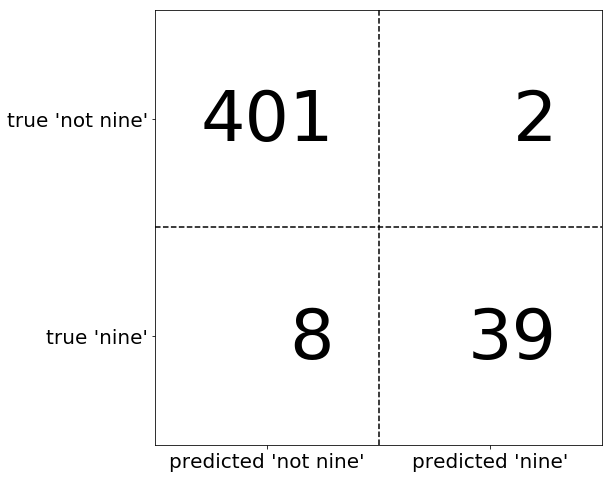

In [11]:
mglearn.plots.plot_confusion_matrix_illustration()

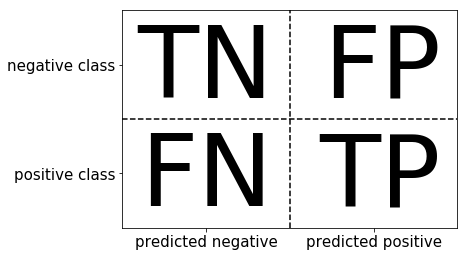

In [12]:
mglearn.plots.plot_binary_confusion_matrix()

In [13]:
print(" :")
print(confusion_matrix(y_test, pred_most_frequent))
print('\n :')
print(confusion_matrix(y_test, pred_dummy))
print('\n :')
print(confusion_matrix(y_test, pred_tree))
print('\n ')
print(confusion_matrix(y_test, pred_logreg))

 :
[[403   0]
 [ 47   0]]

 :
[[372  31]
 [ 45   2]]

 :
[[390  13]
 [ 24  23]]

 
[[401   2]
 [  8  39]]


In [14]:
from sklearn.metrics import f1_score
print(' f1 score: {:.2f}'.format(f1_score(y_test, pred_most_frequent)))

 f1 score: 0.00


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [15]:
print(' f1 score: {:.2f}'.format(f1_score(y_test, pred_dummy)))

 f1 score: 0.05


In [16]:
print(' f1 score: {:.2f}'.format(f1_score(y_test, pred_tree)))
print(' f1 score: {:.2f}'.format(f1_score(y_test, pred_logreg)))

 f1 score: 0.55
 f1 score: 0.89


In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, 
                            target_names=['9', '9']))

              precision    recall  f1-score   support

           9       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

   micro avg       0.90      0.90      0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [18]:
print(classification_report(y_test, pred_logreg, 
                            target_names=['9', '9']))

              precision    recall  f1-score   support

           9       0.98      1.00      0.99       403
           9       0.95      0.83      0.89        47

   micro avg       0.98      0.98      0.98       450
   macro avg       0.97      0.91      0.94       450
weighted avg       0.98      0.98      0.98       450



In [19]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [20]:
from mglearn.datasets import make_blobs
X, y = make_blobs(n_samples=(400,50), centers=2, cluster_std=[7.0,2],
                 random_state=22)
print(X,y)

[[-1.13123317e+01 -1.20918530e+00]
 [ 3.63377400e+00  2.58952562e+00]
 [-2.03502489e+00  3.38227669e+00]
 [-5.91332658e+00  1.25783496e+01]
 [-1.55257743e+01 -9.00101590e+00]
 [-3.27459673e+00  2.05854157e+00]
 [-3.38538661e+00 -5.83864971e+00]
 [-2.40737735e+00  1.35475275e+00]
 [-3.57544439e+00 -5.33265314e+00]
 [-2.80476414e+00 -1.31700661e+00]
 [-1.26992172e+01 -8.87231672e+00]
 [-7.04586997e+00 -3.21313828e+00]
 [ 2.40570228e+00 -5.19551470e+00]
 [-1.01731953e+01 -5.85196829e+00]
 [-5.52518616e+00  3.81125199e+00]
 [-1.03533045e+01  1.99489625e+00]
 [-1.34664801e+00  5.06861451e+00]
 [-2.41046853e+00  6.33209004e+00]
 [ 6.09258713e+00  2.06579987e+00]
 [-8.07561536e+00 -3.70871625e+00]
 [ 1.64358585e+00 -7.06886588e+00]
 [-1.68091223e+00 -1.00768886e+01]
 [-9.27603241e+00  1.17658621e-01]
 [-7.55262603e+00  3.12471356e+00]
 [ 8.49341927e-01  5.96754110e+00]
 [-1.71652375e+00  4.89984429e+00]
 [ 5.59384574e+00 -9.54550755e+00]
 [-5.55877909e+00  8.44258335e+00]
 [ 1.77902916e+00 -1

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
svc = SVC(gamma=.05, probability=True)
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

   micro avg       0.88      0.88      0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [23]:
print(classification_report(svc.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        96
           1       0.67      0.35      0.46        17

   micro avg       0.88      0.88      0.88       113
   macro avg       0.78      0.66      0.70       113
weighted avg       0.86      0.88      0.86       113



In [25]:
svc.decision_function(X_test)

array([-0.99973208, -1.00148617, -1.1386043 , -0.98505482, -1.01044247,
       -1.00027441, -1.00609413,  0.88395198, -1.00467053, -1.00283866,
       -1.00097712,  1.07030762, -1.02076344, -0.40435353, -0.48739733,
       -1.00121046, -1.09560781, -1.44572917, -0.99908802, -1.00070245,
       -0.44364565, -1.01170286, -0.99918954, -1.0861769 , -1.33291363,
       -1.00320657, -0.99076097, -1.09564958,  0.63212214, -0.99238394,
       -1.47090403,  0.19153373,  0.74430046, -1.0084656 , -1.15104651,
       -1.02852903, -1.00840776, -1.23180696, -1.0031964 , -1.00023926,
       -1.0013854 , -1.00003771, -1.10114776, -0.98779744, -1.05818617,
       -1.00105363,  0.5230006 ,  0.97789353, -0.99559099,  0.52008479,
       -1.25711078, -1.08267667, -0.99828696, -1.00385465,  0.08620484,
       -0.99871026, -1.06221884, -1.02415268, -1.08797969, -1.06010122,
        0.36988055, -1.05630237, -0.99981001, -0.24173165, -1.02857919,
       -1.00058106, -0.99968788, -1.00115386, -0.99882791,  1.25

In [30]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [31]:
y_pred_lower_threshold

array([False, False, False, False, False, False, False,  True, False,
       False, False,  True, False,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False,  True, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
        True, False, False, False, False, False,  True, False, False,
       False,  True,  True, False, False, False,  True, False, False,
        True, False, False,  True, False,  True, False,  True, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False, False,  True, False, False,  True, False,
       False, False,  True, False, False])

In [32]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

   micro avg       0.83      0.83      0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



In [33]:
_lower_threshold = svc.decision_function(X_test) > 1

In [34]:
y_pred_lower_threshold

array([False, False, False, False, False, False, False,  True, False,
       False, False,  True, False,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False,  True, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
        True, False, False, False, False, False,  True, False, False,
       False,  True,  True, False, False, False,  True, False, False,
        True, False, False,  True, False,  True, False,  True, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False, False,  True, False, False,  True, False,
       False, False,  True, False, False])

In [35]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

   micro avg       0.83      0.83      0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



In [36]:
svc.predict_proba(X_test)

array([[0.94265968, 0.05734032],
       [0.94287161, 0.05712839],
       [0.95731067, 0.04268933],
       [0.94085695, 0.05914305],
       [0.9439422 , 0.0560578 ],
       [0.94272528, 0.05727472],
       [0.94342482, 0.05657518],
       [0.22342343, 0.77657657],
       [0.94325446, 0.05674554],
       [0.94303451, 0.05696549],
       [0.94281018, 0.05718982],
       [0.16096828, 0.83903172],
       [0.94515229, 0.05484771],
       [0.82509691, 0.17490309],
       [0.84961227, 0.15038773],
       [0.94283835, 0.05716165],
       [0.95321016, 0.04678984],
       [0.97795139, 0.02204861],
       [0.94258167, 0.05741833],
       [0.94277701, 0.05722299],
       [0.83706835, 0.16293165],
       [0.94409133, 0.05590867],
       [0.94259398, 0.05740602],
       [0.95226121, 0.04773879],
       [0.97187207, 0.02812793],
       [0.94307875, 0.05692125],
       [0.94156408, 0.05843592],
       [0.95321432, 0.04678568],
       [0.33203401, 0.66796599],
       [0.94176374, 0.05823626],
       [0.

In [37]:
y_pred_threshold = svc.predict_proba(X_test) > 0.8

In [38]:
import numpy as np
y_pred_threshold = y_pred_threshold.argmax(axis=1)

In [39]:
print(classification_report(y_test, y_pred_threshold))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       104
           1       0.60      0.33      0.43         9

   micro avg       0.93      0.93      0.93       113
   macro avg       0.77      0.66      0.70       113
weighted avg       0.92      0.93      0.92       113



# ROC

In [40]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, 
svc.decision_function(X_test))
print(thresholds)

[-0.7512563  -0.58749402 -0.48739733 -0.44364565 -0.40435353 -0.28965335
 -0.24173165 -0.19257469 -0.17852475 -0.16644845 -0.1601932   0.08620484
  0.14630375  0.19153373  0.36988055  0.52008479  0.5230006   0.53195462
  0.63212214  0.74430046  0.87212596  0.88002558  0.88395198  0.97789353
  1.00010384  1.07030762  1.08436417  1.25059991]


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


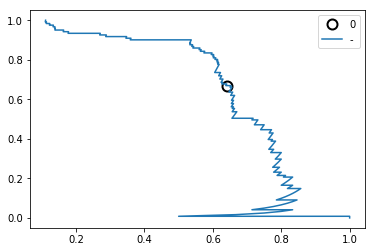

In [43]:
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=(4000, 500), centers=2, 
        cluster_std=[7.0,2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(y_test, 
    svc.decision_function(X_test))
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
        label='0', fillstyle='none', c='k', mew=2)
plt.plot(precision, recall, label='-')
plt.xlabel('')
plt.ylabel('')
plt.legend(loc='best')

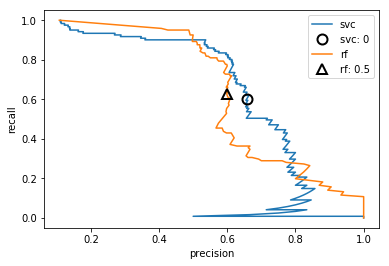

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0,
                           max_features=2)
rf.fit(X_train, y_train)

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test,
    rf.predict_proba(X_test)[:, 1])

svc = SVC(gamma=.05, probability=True).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(y_test, 
                        svc.predict_proba(X_test)[:,1])
plt.plot(precision, recall, label='svc')

close_default_svc = np.argmin(np.abs(thresholds - 0.5))
plt.plot(precision[close_default_svc], recall[close_default_svc], 'o',
        markersize=10, label='svc: 0', fillstyle='none', c='k', mew=2)
plt.plot(precision_rf, recall_rf, label='rf')
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf],
'^', c='k', markersize=10, label='rf: 0.5', fillstyle='none', mew=2)

plt.xlabel('precision')
plt.ylabel('recall')
plt.legend(loc='best')


In [45]:
print('f1_score: {:.3f}'.format(f1_score(y_test, rf.predict(X_test))))
print('svc f1_score: {:.3f}'.format(f1_score(y_test, svc.predict(X_test))))

f1_score: 0.610
svc f1_score: 0.656


In [47]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:,1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print(" : {:.3f}".format(ap_rf))
print("svc : {:.3f}".format(ap_svc))

 : 0.660
svc : 0.666


# ROC AUC

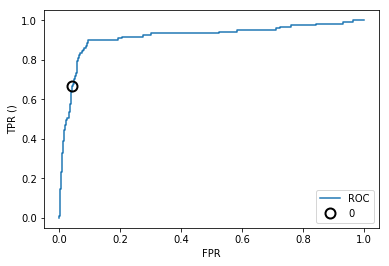

In [48]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
plt.plot(fpr, tpr, label='ROC')
plt.xlabel('FPR')
plt.ylabel('TPR ()')

close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
        label='0', fillstyle='none', c='k', mew=2)
plt.legend(loc=4)

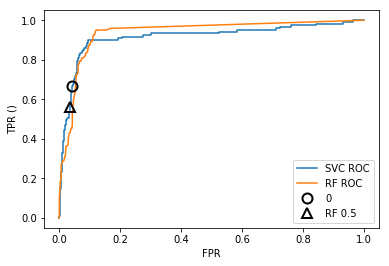

In [49]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba
                                          (X_test)[:,1])
plt.plot(fpr, tpr, label='SVC ROC')
plt.plot(fpr_rf, tpr_rf, label='RF ROC')
plt.xlabel('FPR')
plt.ylabel('TPR ()')
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
        label='0', fillstyle='none', c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr[close_default_rf], tpr[close_default_rf], '^', markersize=10,
        label='RF 0.5', fillstyle='none', c='k', mew=2)
plt.legend(loc=4)

In [50]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC : {:.3f}".format(rf_auc))
print('SVC AUC: {:.3f}'.format(svc_auc))

AUC : 0.937
SVC AUC: 0.916


In [53]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print(": {:.3f}".format(accuracy_score(y_test, pred)))
print(" :\n{}".format(confusion_matrix(y_test, pred)))

: 0.953
 :
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


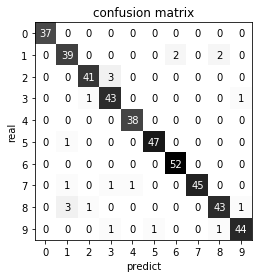

In [52]:
scores_image = mglearn.tools.heatmap(
confusion_matrix(y_test, pred), xlabel='predict',
ylabel='real', xticklabels=digits.target_names,
yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")
plt.title("confusion matrix")
plt.gca().invert_yaxis()

In [54]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44
           3       0.90      0.96      0.92        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       0.93      0.90      0.91        48
           9       0.96      0.94      0.95        47

   micro avg       0.95      0.95      0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [55]:
print("accuracy : {:.3f}".format(accuracy_score(y_test, pred)))
print("micro f1 : {:.3f}".\
format(f1_score(y_test, pred, average="micro")))
print("macro f1 : {:.3f}".\
format(f1_score(y_test, pred, average="macro")))
print("macro f1 : {:.3f}".\
format(f1_score(y_test, pred, average="weighted")))

accuracy : 0.953
micro f1 : 0.953
macro f1 : 0.954
macro f1 : 0.953


In [59]:
print(" : {}".format(
cross_val_score(SVC(), digits.data, digits.target == 9)))
explicit_accuracy = cross_val_score(SVC(), digits.data, \
digits.target == 9, scoring="accuracy")
print(" : {}".format(explicit_accuracy))
roc_auc = cross_val_score(SVC(), digits.data, \
digits.target == 9, scoring="roc_auc")

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma wil

 : [0.89983306 0.89983306 0.89983306]


C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


 : [0.89983306 0.89983306 0.89983306]


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma wil

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
digits.data, digits.target == 9, random_state=0)
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print(" ")
print(" :", grid.best_params_)
print(" ()): {:.3f}".\
format(grid.best_score_))
print(" accuracy: {:.3f}".\
format(grid.score(X_test, y_test)))
print(" AUC: {:.3f}".format(
roc_auc_score(y_test, \
grid.decision_function(X_test))))
print(" accuracy: {:.3f}".\
format(grid.score(X_test, y_test)))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


 
 : {'gamma': 0.0001}
 ()): 0.970
 accuracy: 0.973
 AUC: 0.992
 accuracy: 0.973


In [60]:
grid = GridSearchCV(SVC(), param_grid=param_grid, \
scoring="roc_auc")
grid.fit(X_train, y_train)
print("AUC ")
print(" :", grid.best_params_)
print(" (AUC): {:.3f}".\
format(grid.best_score_))
print(" AUC: {:.3f}".\
format(grid.score(X_test, y_test)))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


AUC 
 : {'gamma': 0.01}
 (AUC): 0.997
 AUC: 1.000
